## PROBLEM SET 3

 ### QUESTION 1

In [188]:
#Step 1. Import the necessary libraries
import numpy as np
import pandas as pd

In [189]:
#Step 2. Import the dataset
# Step 3. Assign it to a variable called users
users=pd.read_csv(r"https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user",sep="|")
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [190]:
#Step 4. Discover what is the mean age per occupation
mean_age_per_occup = users.groupby("occupation").age.mean()
print("Average age occupation wise")
print(mean_age_per_occup)


Average age occupation wise
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [191]:
#Step 5. Discover the Male ratio per occupation and sort it from the most to the least 

male_count=users.where(users.gender=="M").groupby(["occupation","gender"]).gender.count()
total_count=users.groupby("occupation").gender.count()
ratio=(male_count/total_count).sort_values(ascending=False)
print("Male ratio per occupation")
ratio


Male ratio per occupation


occupation     gender
doctor         M         1.000000
engineer       M         0.970149
technician     M         0.962963
retired        M         0.928571
programmer     M         0.909091
executive      M         0.906250
scientist      M         0.903226
entertainment  M         0.888889
lawyer         M         0.833333
salesman       M         0.750000
educator       M         0.726316
student        M         0.693878
other          M         0.657143
marketing      M         0.615385
writer         M         0.577778
none           M         0.555556
administrator  M         0.544304
artist         M         0.535714
librarian      M         0.431373
healthcare     M         0.312500
homemaker      M         0.142857
Name: gender, dtype: float64

In [192]:
#Step 6. For each occupation, calculate the minimum and maximum ages

users.groupby(["occupation"]).age.agg(["min","max"])


,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [193]:
#Step 7. For each combination of occupation and sex, calculate the mean age 

users.groupby(['occupation','gender']).agg({'age': ['mean']})

age
                           mean
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [194]:
#Step 8. For each occupation present the percentage of women and men

female_count=users.where(users.gender=='F').groupby(['occupation','gender']).gender.agg(['count'])
male_count=users.where(users.gender=='M').groupby(['occupation','gender']).gender.agg(['count'])
total_count=users.groupby('occupation').gender.agg(['count'])
male_ratio=(male_count/total_count)*100
female_ratio=(female_count/total_count)*100
pd.merge(male_ratio,female_ratio,on='occupation')

,count_x,count_y
occupation,,
administrator,54.430380,45.569620
artist,53.571429,46.428571
educator,72.631579,27.368421
engineer,97.014925,2.985075
entertainment,88.888889,11.111111
executive,90.625000,9.375000
healthcare,31.250000,68.750000
homemaker,14.285714,85.714286
lawyer,83.333333,16.666667


### Question2

In [195]:
#Step 1. Import the necessary libraries

import numpy as np
import pandas as pd


In [196]:
#Step 2. Import the dataset from this address
#Step 3. Assign it to a variable called euro12 
euro12=pd.read_csv(r"https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv",sep=",")
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [197]:
#Step 4. Select only the Goal column

euro12.Goals


0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [198]:
#Step 5. How many team participated in the Euro2012? 

print("Total teams participated in the Euro12 are :",len(euro12['Team'].unique()))


Total teams participated in the Euro12 are : 16


In [199]:
#Step 6. What is the number of columns in the dataset?

print(" Total columns in the dataset are ", euro12.shape[1])


 Total columns in the dataset are  35


In [200]:
#Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
Data_Frame=euro12[["Team","Yellow Cards","Red Cards"]]
discipline=pd.DataFrame(Data_Frame)
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [201]:
#Step 8. Sort the teams by Red Cards, then to Yellow Cards 

discipline.sort_values(by=['Red Cards', 'Yellow Cards'],ascending = True)


,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [202]:
#Step 9. Calculate the mean Yellow Cards given per Team
discipline.groupby("Team")["Yellow Cards"].mean()


Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

In [203]:
#Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start with G
euro12[euro12.Goals > 6]


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [204]:
euro12[euro12["Team"].str.startswith("G")]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [205]:
#Step 12. Select the first 7 columns

euro12.iloc[:,:7]


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [206]:
#Step 13. Select all columns except the last 3

euro12.iloc[:,:-3]


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [207]:
# Step 14. Present only the Shooting Accuracy from England, Italy and Russia

euro12.loc[euro12.Team.isin(['England','Italy','Russia']),['Team','Shooting Accuracy']]


,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


### Question3

In [208]:
#Step 1. Import the necessary libraries

import numpy as np
import pandas as pd
import random


In [209]:
# Step 2. Create 3 differents Series, each of length 100, as follows:
# • The first a random number from 1 to 4
# • The second a random number from 1 to 3
# • The third a random number from 10,000 to 30,000

x = pd.Series(np.random.randint(1,5,100))
y = pd.Series(np.random.randint(1,4,100))
z = pd.Series(np.random.randint(10000,30000,100))

In [210]:
# Step 3. Create a DataFrame by joinning the Series by column

data = {'series1' : x,'series2':y,'series3':z}
df = pd.concat(data, axis = 1)
df

,series1,series2,series3
0,2,2,12744
1,2,3,18333
2,4,1,22090
3,1,1,20020
4,1,2,15780
...,...,...,...
95,4,1,17658
96,4,1,11390
97,3,3,20884
98,1,2,17511


In [211]:
# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

df.columns = ["bedrs","bathrs","price_sqr_meter"]
df

,bedrs,bathrs,price_sqr_meter
0,2,2,12744
1,2,3,18333
2,4,1,22090
3,1,1,20020
4,1,2,15780
...,...,...,...
95,4,1,17658
96,4,1,11390
97,3,3,20884
98,1,2,17511


In [212]:
# Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.DataFrame(df['bedrs'].astype(str) + df['bathrs'].astype(str) + df['price_sqr_meter'].astype(str))
bigcolumn

,0
0,2212744
1,2318333
2,4122090
3,1120020
4,1215780
...,...
95,4117658
96,4111390
97,3320884
98,1217511


In [213]:
# Step 6. Ops it seems it is going only until index 99. Is it true? 

## Yes. we can see that the index is only going till 99 and the maximum rows are only 100
print(len(bigcolumn))


100


In [214]:
# Step 7. Reindex the DataFrame so it goes from 0 to 299

bigcolumn.reindex(range(0, 300))


,0
0,2212744
1,2318333
2,4122090
3,1120020
4,1215780
...,...
295,NaN
296,NaN
297,NaN
298,NaN


### Question 4

In [215]:
# Step 1. Import the necessary libraries

import pandas as pd
from datetime import date
import datetime as dt 


In [216]:
# Step 2. Import the dataset from the attached file wind.txt
# Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index
data= pd.read_fwf('wind.txt',parse_dates=[['Yr','Mo','Dy']])
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [217]:
# Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
data["Yr_Mo_Dy"] = np.where(pd.DatetimeIndex(data["Yr_Mo_Dy"]).year < 2061,data.Yr_Mo_Dy,data.Yr_Mo_Dy - pd.offsets.DateOffset(years=100))
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [218]:
# Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])
display(data.dtypes)
data = data.set_index('Yr_Mo_Dy')
data.index
data


Yr_Mo_Dy    datetime64[ns]
RPT                float64
VAL                float64
ROS                float64
KIL                float64
SHA                float64
BIR                float64
DUB                float64
CLA                float64
MUL                float64
CLO                float64
BEL                float64
MAL                float64
dtype: object

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [219]:
# Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below
data.isnull().values.sum()


31

In [220]:
new_data = data.dropna() 

In [221]:
# Step 7. Compute how many non-missing values there are in total.

data.notnull().sum()


RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [222]:
# Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
data.mean().mean()


10.227982360836924

In [224]:
# Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
#windspeeds and standard deviations of the windspeeds at each location over all the
#days A different set of numbers for each location
mini=new_data.min()
maxi=new_data.max()
mean=new_data.mean()
std=new_data.std()
var=[mini,maxi,mean,std]
index=["Min","Max","Mean","Std"]
loc_stats= pd.DataFrame(var,index)
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
Max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
Mean,12.359979,10.640267,11.656396,6.298587,10.448923,7.085066,9.793006,8.486601,8.490257,8.696705,13.110668,15.603129
Std,5.618805,5.268695,5.007805,3.600942,4.933988,3.967735,4.978030,4.498299,4.165947,4.500488,5.829054,6.702178


In [225]:
#Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.
day_stats = pd.concat([new_data.min(axis=1), new_data.max(axis=1), new_data.mean(axis=1), new_data.std(axis=1)], axis=1)

day_stats.rename(columns={0:'Min',1:'Max',2:'Mean',3:'Std'}, inplace=True)
day_stats


,Min,Max,Mean,Std
Yr_Mo_Dy,,,,
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
1961-01-06,4.42,13.21,8.240000,2.998063
1961-01-07,4.96,14.29,10.385000,3.072114
1961-01-08,5.91,16.62,10.487500,3.547237
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [226]:
# Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.
new_data[new_data.index.month==1].mean()


RPT    14.831609
VAL    12.885389
ROS    13.276275
KIL     7.152477
SHA    11.644467
BIR     8.030561
DUB    11.788336
CLA     9.486962
MUL     9.511501
CLO    10.024069
BEL    14.527848
MAL    18.041826
dtype: float64

In [227]:
# Step 12. Downsample the record to a yearly frequency for each location. 

downsample_data = data.resample('Y').ffill()
downsample_data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-12-31,9.87,7.83,7.67,3.75,5.66,3.50,10.04,3.08,5.04,3.79,8.04,14.67
1962-12-31,22.67,16.88,28.67,14.12,19.75,17.08,27.79,25.21,19.83,17.79,25.46,37.63
1963-12-31,13.88,14.42,12.12,9.25,14.33,10.67,18.29,11.96,12.04,15.37,16.79,14.09
1964-12-31,16.33,19.25,13.37,10.08,17.04,12.54,19.83,13.79,12.67,15.04,21.37,23.58
1965-12-31,13.62,13.88,12.29,6.08,12.33,7.41,9.59,10.21,7.46,12.17,15.71,16.75
1966-12-31,13.00,11.46,10.13,6.34,11.87,7.50,13.50,8.46,11.00,10.04,17.29,22.46
1967-12-31,16.88,13.75,11.34,9.08,13.54,7.71,11.75,11.83,11.83,11.75,17.25,22.63
1968-12-31,9.13,2.13,7.38,2.50,4.04,0.50,6.83,2.54,3.54,5.50,5.71,12.42
1969-12-31,14.42,13.83,27.71,7.08,12.08,10.00,14.58,11.00,12.54,7.12,11.17,17.41


In [228]:
#Step 13. Downsample the record to a monthly frequency for each location.
month_downsample= data.resample('M').ffill()
month_downsample.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-31,24.21,19.55,16.71,11.96,14.42,10.46,14.88,8.21,10.50,9.96,12.42,13.92
1961-02-28,12.92,12.75,NaN,8.92,16.13,12.29,14.75,14.46,13.96,14.04,18.41,13.17
1961-03-31,8.96,8.04,9.13,8.50,10.75,9.54,11.92,9.59,11.25,8.54,11.96,12.21
1961-04-30,11.67,11.00,9.54,5.54,9.42,5.79,5.09,8.25,6.96,6.25,12.21,8.75
1961-05-31,7.00,9.79,12.25,4.83,8.25,5.37,6.58,9.29,6.58,7.12,11.87,10.63


In [229]:
#Step 14. Downsample the record to a weekly frequency for each location.
week_downsample= data.resample('W').ffill()
week_downsample.head()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
1961-01-15,12.04,9.67,11.75,2.37,7.38,3.13,2.50,6.83,4.75,5.63,7.54,6.75
1961-01-22,9.59,5.88,9.92,2.17,6.87,5.50,9.38,7.04,6.34,7.50,10.88,9.92
1961-01-29,NaN,23.91,22.29,17.54,24.08,19.70,22.00,20.25,21.46,19.95,27.71,23.38


In [230]:
# Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.
week_stat=week_downsample.groupby(week_downsample.index.to_period('W')).agg(['min','max','mean','std'])
week_stat.loc[week_stat.index[1:53],:].head()

RPT                      VAL                    \
                         min    max   mean std    min    max   mean std   
Yr_Mo_Dy                                                                  
1961-01-02/1961-01-08  10.96  10.96  10.96 NaN   9.75   9.75   9.75 NaN   
1961-01-09/1961-01-15  12.04  12.04  12.04 NaN   9.67   9.67   9.67 NaN   
1961-01-16/1961-01-22   9.59   9.59   9.59 NaN   5.88   5.88   5.88 NaN   
1961-01-23/1961-01-29    NaN    NaN    NaN NaN  23.91  23.91  23.91 NaN   
1961-01-30/1961-02-05  22.00  22.00  22.00 NaN  16.75  16.75  16.75 NaN   

                         ROS         ...    CLO        BEL                    \
                         min    max  ...   mean std    min    max   mean std   
Yr_Mo_Dy                             ...                                       
1961-01-02/1961-01-08   7.62   7.62  ...  10.46 NaN  16.62  16.62  16.62 NaN   
1961-01-09/1961-01-15  11.75  11.75  ...   5.63 NaN   7.54   7.54   7.54 NaN   
1961-01-16/1961-01-22   9.92   9.92  ...   7.50 NaN  10.88  10.88  10.88 NaN   
1961-01-23/1961-01-29  22.29  22.29  ...  19.95 NaN  27.71  27.71  27.71 NaN   
1961-01-30/1961-02-05  19.70  19.70  ...  13.13 NaN  19.33  19.33  19.33 NaN   

                         MAL                    
                         min    max   mean std  
Yr_Mo_Dy                                        
1961-01-02/1961-01-08  16.46  16.46  16.46 NaN  
1961-01-09/1961-01-15   6.75   6.75   6.75 NaN  
1961-01-16/1961-01-22   9.92   9.92   9.92 NaN  
1961-01-23/1961-01-29  23.38  23.38  23.38 NaN  
1961-01-30/1961-02-05  14.67  14.67  14.67 NaN  

[5 rows x 48 columns]

### Question5

In [231]:
#Step1 - Importing necessary libraries : 
import pandas as pd
import numpy as np

In [232]:
#Step2 & Step3 - Importing dataset from git-hub link and assigning it a variable called chipo :
link = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_table(link)

In [233]:
#Step 4. See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [234]:
# Step 5. What is the number of observations in the dataset? 

print("Total Observations ={} *{} ".format(chipo.shape[0],chipo.shape[1]))


Total Observations =4622 *5 


In [235]:
# Step 6. What is the number of columns in the dataset?

len(chipo.columns)


5

In [236]:
# Step 7. Print the name of all the columns. 

chipo.columns


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [237]:
# Step 8. How is the dataset indexed?

chipo.index


RangeIndex(start=0, stop=4622, step=1)

In [238]:
# Step 9. Which was the most-ordered item?

most_ordered=chipo.groupby('item_name').sum()
most_ordered=most_ordered.sort_values(by=['quantity'], ascending = False)
most_ordered.head(1)


,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [239]:
# Step 10. For the most-ordered item, how many items were ordered?

choice_ordered=chipo.groupby('choice_description').sum()
choice_ordered=choice_ordered.sort_values(by=['quantity'], ascending = False)
choice_ordered.head(5)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159
[Coke],122752,143
[Sprite],80426,89
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",43088,49
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]",36041,42


In [240]:
# Step 12. How many items were orderd in total?

chipo.groupby('quantity').quantity.sum().sum()


4972

In [241]:
# Step 13.
#• Turn the item price into a float
#• Check the item price type
#• Create a lambda function and change the type of item price
#• Check the item price type
chipo.item_price.dtype


dtype('O')

In [242]:
try:                                                 
    convertToFloat = lambda x: float(x[1:-1])
    chipo.item_price = chipo.item_price.apply(convertToFloat)
except:TypeError    


In [243]:
chipo.item_price.dtype


dtype('float64')

In [244]:
#Step 14. How much was the revenue for the period in the dataset? 

revenue = (chipo['quantity'] * chipo['item_price'])
revenue.sum()

39237.02

In [245]:
# Step 15. How many orders were made in the period?

chipo.order_id.value_counts().count()


1834

In [246]:
# Step 16. What is the average revenue amount per order? 

avg_revenue = chipo['quantity'] * chipo['item_price']
d = order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()

quantity       2.711014
item_price    18.811429
dtype: float64

In [247]:
# Step 17. How many different items are sold?

chipo.item_name.value_counts().count()


50

### Question 6

In [248]:
# Create a line plot showing the number of marriages and divorces per capita in the
#U.S. between 1867 and 2014. Label both lines and show the legend.
#Don't forget to label your axes!

import matplotlib.pyplot as plt
import pandas as pd


In [249]:
marriage_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
marriage_data.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


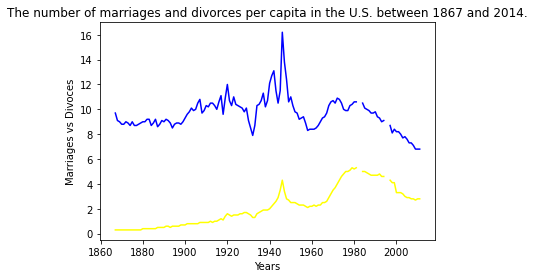

In [250]:
year=marriage_data.Year.values
marriage=marriage_data.Marriages_per_1000.values
divorce=marriage_data.Divorces_per_1000.values

plt.plot(year,marriage,color="Blue")
plt.plot(year,divorce,color="Yellow")
plt.xlabel("Years")
plt.ylabel("Marriages vs Divoces")
plt.title("The number of marriages and divorces per capita in the U.S. between 1867 and 2014.")
plt.show()

### Question 7

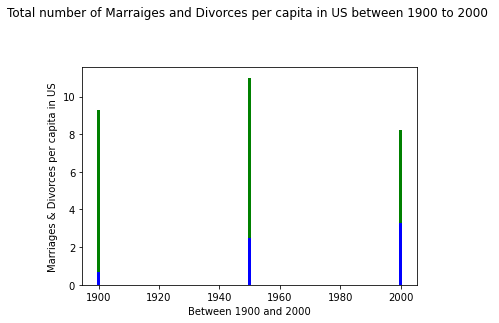

In [251]:
# Create a vertical bar chart comparing the number of marriages and divorces per
#capita in the U.S. between 1900, 1950, and 2000.
#Don't forget to label your axes!
years=[1900,1950,2000]
data = marriage_data.loc[marriage_data['Year'].isin(years)]
plt.bar(data['Year'],data['Marriages_per_1000'],color="Green")
plt.bar(data['Year'],data['Divorces_per_1000'],color="Blue")
plt.title("Total number of Marraiges and Divorces per capita in US between 1900 to 2000 \n\n\n")
plt.xlabel("Between 1900 and 2000")
plt.ylabel("Marriages & Divorces per capita in US")
plt.show()


### Question8

In [252]:
# Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
#the actors by their kill count and label each bar with the corresponding actor's name.
#Don't forget to label your axes!

actors = pd.read_csv('actor_kill_counts.csv')
actors.head(10)


,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


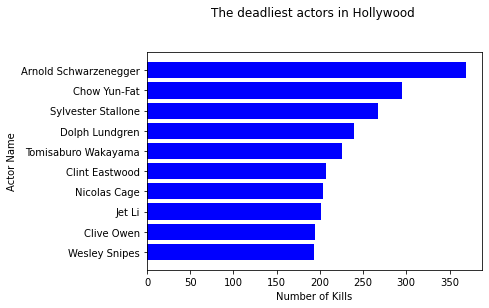

In [253]:
sort_actors =actors.sort_values(by='Count',ascending=True)
actor_Names= actors.Actor
plt.barh(sort_actors['Actor'],sort_actors['Count'],color="blue")
plt.xlabel("Number of Kills")
plt.ylabel("Actor Name")
plt.title("The deadliest actors in Hollywood \n\n ")
plt.show()


### Question9

In [254]:
#Create a pie chart showing the fraction of all Roman Emperors that were
#assassinated.

roman_data= pd.read_csv('roman-emperor-reigns.csv')
roman_data.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


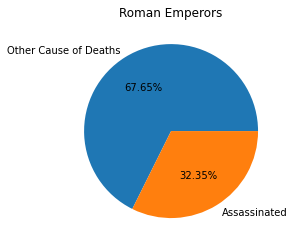

In [255]:
lowerData= roman_data.where(roman_data.Cause_of_Death=="Assassinated").Cause_of_Death.count()
remaining= roman_data.Cause_of_Death.count()-lowerData
label=["Other Cause of Deaths","Assassinated"]
plt.pie([remaining,lowerData],labels=label,autopct='%.2f%%')
plt.title("Roman Emperors")
plt.show()

### Question 10

In [256]:
#Create a scatter plot showing the relationship between the total revenue earned by
#arcades and the number of Computer Science PhDs awarded in the U.S. between
#2000 and 2009.
import seaborn as sns

In [257]:
revenue_data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
revenue_data.head(10)


,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


<AxesSubplot:xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

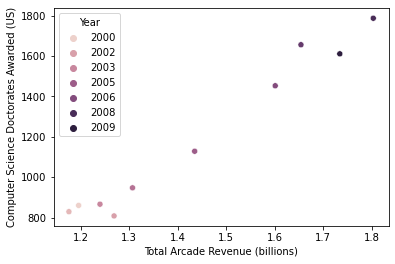

In [258]:
sns.scatterplot(x=revenue_data['Total Arcade Revenue (billions)'], y=revenue_data['Computer Science Doctorates Awarded (US)'], data= revenue_data, hue = 'Year')